<a href="https://colab.research.google.com/github/mvoassis/ibge_descriptive_analysis/blob/main/IBGE_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>Descriptive Analysis</font>
***

## Marcos V. O. Assis (mvoassis@gmail.com)

Performing a basic descriptive analysis over a dataset retrieved from the brazilian National Household Sample Survey - 2015 by IBGE.

The objective is to apply simple statistics, as well as data manipulation/visualization, to extract relevant information from the dataset.

# <font color=green>PROJECT DATASET</font>
***

### National Household Sample Survey - 2015

The <b>National Household Sample Survey - 2015</b> annually investigates, on a permanent basis, general characteristics of the population, education, work, income, housing, and others, with variable frequency, according to the information needs for the country, such as characteristics on migration, fertility, marriage, health, food security, among other topics. The survey of these statistics constitutes, over the 49 years of the research, an important instrument for the formulation, validation and evaluation of policies oriented towards socioeconomic development and the improvement of living conditions in Brazil.

*texto em itálico*### Data Source

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Income (Renda)
> ***

Monthly income from main work for persons aged 10 years and over.

> ### Age (Idade)
> ***

Age of the resident at the reference date in years.

> ### Height (Altura) (own elaboration)
> ***

Height of resident in meters. Constructed under normal distribution for testing. 

> ### State (UF)
> ***

|Code|Description|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sex (Sexo)	
> ***

|Code|Description|
|---|---|
|0|Male|
|1|Female|

> ### Years of Study (Anos de Estudo)
> ***

|Code|Description|
|---|---|
|1|No education and less than 1 year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years|
|14|13 years|
|15|14 years|
|16|15 years or more|
|17|Not determined| 
||Not applicable|

> ### Color (Cor)
> ***

|Código|Descrição|
|---|---|
|0|Indigenous|
|2|White|
|4|Black|
|6|Yellow|
|8|Brown|
|9|No declaration|

#### <font color='red'>Note</font>
***

> The following treatments were performed on the original data:
> 1. The records where the <b>Income</b> was invalid (999 999 999 999) were eliminated;
> 2. The records where the <b>Income</b> was missing were eliminated;
> 3. Only the records of the <b>Reference Persons</b> of each household (responsible for the household) were considered.

***
***

# <font color=green>Data Analysis</font>
***

### Importing required libraries


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importing data and storing it in a Pandas DataFrame

In [98]:
data = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [99]:
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Translating column names

In [100]:
data.columns = ['State', 'Sex', 'Age', 'Color', 'Years of Study', 'Income', 'Height']
data.head()

,State,Sex,Age,Color,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### To evaluate the behavior of the INCOME variable, I'll build a frequency table considering the following classes in minimum wages (MW)


Income classes:

<b>A</b> ► Above 25 SM

<b>B</b> ► From 15 to 25 SM

<b>C</b> ► From 5 to 15 SM

<b>D</b> ► From 2 to 5 SM

<b>E</b> ► Up to 2 SM

To construct the income classes, I am considering that the minimum wage at the time of the research (2015) was <b>R$ 788.00</b>.

### Defining the class intervals in brazilian reais (R$)

In [101]:
base = 788
classes = [0, 2*base, 5*base, 15*base, 25*base, data.Income.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### Defining class labels

In [102]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### Constructing a frequency colunmn

In [103]:
frequency = (
    pd.cut(x=data.Income, 
           bins=classes, 
           labels=labels, 
           include_lowest= True)).value_counts().sort_values()
frequency

A      420
B      822
C     7241
D    18602
E    49755
Name: Income, dtype: int64

### Constructing a column of percentage

In [104]:
percentage = pd.value_counts(
    pd.cut(x=data.Income, 
           bins=classes, 
           labels=labels, 
           include_lowest= True), 
    normalize=True)
percentage


E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Income, dtype: float64

### Merging frequency and percentage columns and sort the lines according to the class labels

In [105]:
tab_freq_percent = pd.DataFrame({'Frequency':frequency, 'Percentage':percentage}).sort_index(ascending=False)
tab_freq_percent

,Frequency,Percentage
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Constructing a bar plot to visualize the percentage information of the table above

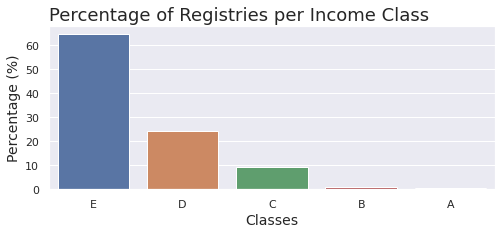

In [106]:
sns.set()
ax = sns.barplot(y='Percentage', x=tab_freq_percent.index, data=tab_freq_percent)
ax.figure.set_size_inches(8,3)
ax.set_title('Percentage of Registries per Income Class', fontsize=18, loc='left')
ax.set_yticklabels([i*10 for i in range(11)])
ax.set_ylabel('Percentage (%)',fontsize=14)
ax.set_xlabel('Classes',fontsize=14)
ax = ax

> ### Conclusions

* Most records correspond to people of class E.

* The higher the class, the lower the number of records found.

### Creating an histogram for some of the quantitative variables of the dataset.


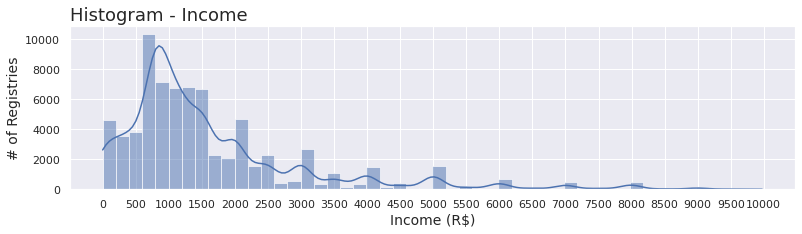

In [107]:
# Income
# Query was performed to improve visualization

ax = sns.histplot(data = data.query('Income < 10000'), x='Income', bins=50, kde=True)
ax.figure.set_size_inches(13,3)
ax.set_title('Histogram - Income', fontsize=18, loc='left')
ax.set_ylabel('# of Registries',fontsize=14)
ax.set_xlabel('Income (R$)',fontsize=14)
ax.set_xticks([i*500 for i in range(21)])
ax = ax

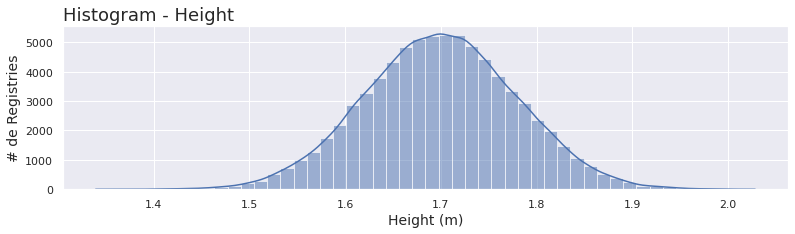

In [108]:
# Height
# Own elaboration - Created to visualize a symmetric distribution

ax = sns.histplot(data = data, x='Height', bins=50, kde=True)
ax.figure.set_size_inches(13,3)
ax.set_title('Histogram - Height', fontsize=18, loc='left')
ax.set_ylabel('# de Registries',fontsize=14)
ax.set_xlabel('Height (m)',fontsize=14)
ax = ax

Média = 9.469664237376367
Mediana = 11.0
Moda = 12


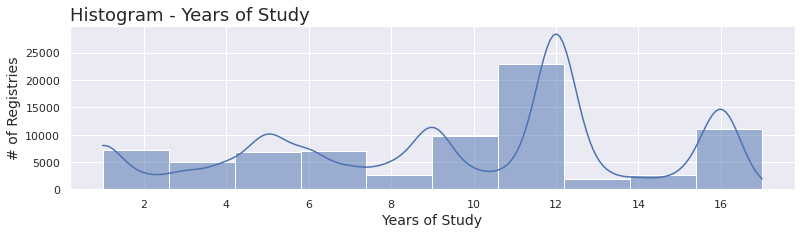

In [109]:
ax = sns.histplot(data = data, x='Years of Study', kde=True, bins = 10)
ax.figure.set_size_inches(13,3)
ax.set_title('Histogram - Years of Study', fontsize=18, loc='left')
ax.set_ylabel('# of Registries',fontsize=14)
ax.set_xlabel('Years of Study',fontsize=14)
ax = ax

print('Média = %s' % data['Years of Study'].mean())
print('Mediana = %s' % data['Years of Study'].median())
print('Moda = %s' % data['Years of Study'].mode()[0])

> ### Conclusions

* In the Income Histogram, it is noted that most records are in the range between R\$500 and R\$1000, possibly representing the minimum wage (R\$ 788). It is a conspicuously Right-skewed distribution, caused by very large Income values.

* In the Height Histogram, as it is a created variable, there is a symmetrical distribution, where most records are on average, around 1.7m in height.

* Finally, in the Histogram of Years of Study, most records represent individuals from classes 11 and 12, that is, with 10 or 11 years of study, respectively. Although the distribution is not visually clear on the graph, numerically it is possible to verify that it is a Left-skewed distribution.

### Constructing a frequency and a percentage table crossing the variables SEX and COLOR


In [110]:
# Construction dictionaries for code convertion.

sex = {
    0: 'Male', 
    1: 'Female'
}
color = {
    0: 'Indigenous', 
    2: 'White', 
    4: 'Black', 
    6: 'Yellow', 
    8: 'Brown', 
    9: 'No declaration'
}
years_of_study = {
    1: 'No education and less than 1 year', 
    2: '1 year', 
    3: '2 years', 
    4: '3 years', 
    5: '4 years', 
    6: '5 years', 
    7: '6 years', 
    8: '7 years', 
    9: '8 years', 
    10: '9 years', 
    11: '10 years', 
    12: '11 years', 
    13: '12 years', 
    14: '13 years', 
    15: '14 years', 
    16: '15 years or more', 
    17: 'Not determined'
}

state = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [111]:
tab_sex_color = pd.crosstab(data['Sex'], data['Color'], aggfunc='mean', values=data['Income'])
tab_sex_color.rename(index=sex, inplace=True)
tab_sex_color.rename(columns=color, inplace=True)
tab_sex_color = tab_sex_color.round(2)
tab_sex_color

Color,Indigenous,White,Black,Yellow,Brown
Sex,,,,,
Male,1081.71,2925.74,1603.86,4758.25,1659.58
Female,2464.39,2109.87,1134.60,3027.34,1176.76


In [112]:
tab_sex_color_median = pd.crosstab(data['Sex'], data['Color'], aggfunc='median', values=data['Income'])
tab_sex_color_median.rename(index=sex, inplace=True)
tab_sex_color_median.rename(columns=color, inplace=True)
tab_sex_color_median = tab_sex_color_median.round(2)
tab_sex_color_median

Color,Indigenous,White,Black,Yellow,Brown
Sex,,,,,
Male,797.5,1700.0,1200.0,2800.0,1200.0
Female,788.0,1200.0,800.0,1500.0,800.0


> ### Conclusions

* Evaluating the average, men of yellow color have higher income, according to the evaluated records. Women have a lower income than men, with the exception of indigenous women, who have a higher average income than indigenous men.

* Evaluating the median (average value), the median income of indigenous women also becomes lower than that of indigenous men, which indicates possible outliers in the distribution (not necessarily wrong records). In the median, Yellow men continue to have higher income than other types of records.

## Performing a descriptive analysis of the INCOME variable

### Retrieving the average

In [113]:
data['Income'].mean()

2000.3831988547631

### Retrieving the median

In [114]:
data['Income'].median()

1200.0

### Retrieving the mode

In [115]:
data['Income'].mode()[0]

788

### Retrieving the Mean Absolute Deviation

In [116]:
data['Income'].mad()

1526.4951371644931

### Retrieving the Variance

In [117]:
data['Income'].var()

11044906.00622118

### Retrieving the Standard Deviation

In [118]:
data['Income'].std()

3323.3877303470294

### Retrieving the average, median and max value of the INCOME variable according to SEX and COLOR


In [119]:
tab_sex_color = pd.crosstab(data['Sex'], data['Color'], aggfunc={'mean','median','max'}, values=data['Income'])
tab_sex_color.rename(index=sex, inplace=True)
tab_sex_color.rename(columns=color, inplace=True)
tab_sex_color = tab_sex_color.round(2)
tab_sex_color

max                                             mean           \
Color  Indigenous     White    Black   Yellow     Brown Indigenous    White   
Sex                                                                           
Male      10000.0  200000.0  50000.0  50000.0  100000.0    1081.71  2925.74   
Female   120000.0  100000.0  23000.0  20000.0   30000.0    2464.39  2109.87   

                                      median                                  
Color     Black   Yellow    Brown Indigenous   White   Black  Yellow   Brown  
Sex                                                                           
Male    1603.86  4758.25  1659.58      797.5  1700.0  1200.0  2800.0  1200.0  
Female  1134.60  3027.34  1176.76      788.0  1200.0   800.0  1500.0   800.0

> ### Conclusions

* Note that the maximum Income value directly influences the average result: For example, very high incomes, as in the case of white males, influence the average value, calculated at R\$2925.74. However, the median shows that 50% of the records of this selection have income up to R\$1700.

* The maximum income value is only higher for females when the color is Indigenous, which explains the average value for this selection. However, as already discussed, this superiority is not supported by the median, which indicates the presence of outliers.

### Retrieving dispersion metrics of the INCOME variable according to SEX and COLOR


In [120]:
tab_sex_color_disp = pd.crosstab(data['Sex'], data['Color'], aggfunc={'mad','var','std'}, values=data['Income'])
tab_sex_color_disp.rename(index=sex, inplace=True)
tab_sex_color_disp.rename(columns=color, inplace=True)
tab_sex_color_disp = tab_sex_color_disp.round(2)
tab_sex_color_disp

mad                                           std           \
Color  Indigenous    White   Black   Yellow    Brown Indigenous    White   
Sex                                                                        
Male       798.91  2261.01  975.60  3709.60  1125.83    1204.09  4750.79   
Female    3007.89  1670.97  705.45  2549.15   811.58   11957.50  3251.01   

                                            var                           \
Color     Black   Yellow    Brown    Indigenous        White       Black   
Sex                                                                        
Male    1936.31  5740.82  2312.09  1.449841e+06  22570023.41  3749293.59   
Female  1349.80  3731.17  1596.23  1.429818e+08  10569086.53  1821959.52   

                                 
Color        Yellow       Brown  
Sex                              
Male    32957069.62  5345747.15  
Female  13921656.88  2547959.94

> ### Conclusions

* Note that the most dispersed record is related to females, indigenous people, in relation to the standard deviation. According to this metric, the least dispersed record is of male, indigenous people.

* With respect to absolute deviation, the least dispersed record remains the same. However, in absolute terms, the records of Males of Yellow color have a greater dispersion of Income values.

### Constructing a box plot of the INCOME variable according to SEX and COLOR


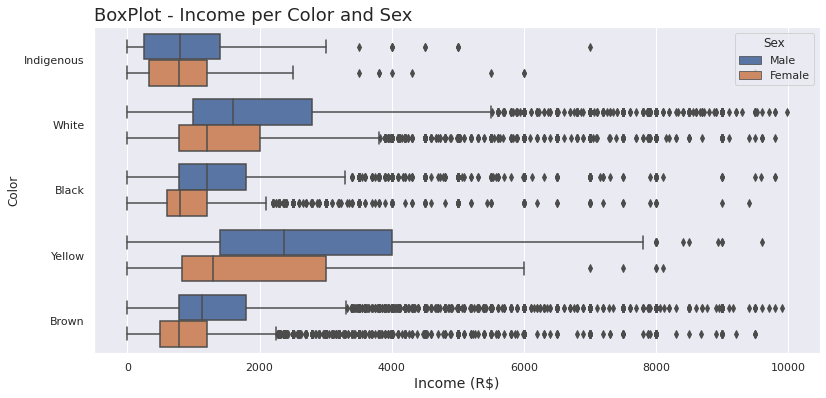

In [121]:
# Limited to records with Income<10000 for better visualization

ax = sns.boxplot(x='Income',y= 'Color', data=data.query('Income < 10000'), orient='h', hue='Sex')
ax.figure.set_size_inches(13,6)
ax.set_title('BoxPlot - Income per Color and Sex', fontsize=18, loc='left')
ax.set_yticklabels(cor.values())
ax.legend_.texts[0].set_text('Male')
ax.legend_.texts[1].set_text('Female')
ax.set_xlabel('Income (R$)',fontsize=14)
ax = ax

> ### Conclusions

* The graph presented consolidates the conclusions obtained from the tables.

* In addition, it is possible to see that people of Black or Brown color have a similar distribution, with brown females having a slightly lower income than black females.

### What percentage of people in the dataset earn a minimum wage (R$788.00) or less?

In [122]:
from scipy import stats

percent_min_wage = stats.percentileofscore(data['Income'],788, kind='weak')
percent_min_wage = np.round(percent_min_wage, 2)

print(f'In the evaluated dataset, {percent_min_wage}% of people earn a minimum wage or less.')

In the evaluated dataset, 28.87% of people earn a minimum wage or less.


### What is the maximum amount earned by 99% of the people in the dataset?


In [123]:
max_99 = data['Income'].quantile(0.99)

print(f'In the evaluated dataset, 99% of the people earn a maximum wage of R$ {max_99}')

In the evaluated dataset, 99% of the people earn a maximum wage of R$ 15000.0


### Retrieving the average, median, max value and standard deviation of the INCOME variable according to YEARS OF STUDY and SEX


In [124]:
tab_yos_sex = pd.crosstab(data['Years of Study'], data['Sex'], aggfunc={'mean','median','max'}, values=data['Income'])
tab_yos_sex.rename(index=years_of_study, inplace=True)
tab_yos_sex.rename(columns=sex, inplace=True)
tab_yos_sex = tab_yos_sex.round(2)
tab_yos_sex

max               mean           \
Sex                                    Male    Female     Male   Female   
Years of Study                                                            
No education and less than 1 year   30000.0   10000.0   799.49   516.20   
1 year                              30000.0    2000.0   895.63   492.77   
2 years                             40000.0    4000.0   931.18   529.91   
3 years                             80000.0    3500.0  1109.20   546.85   
4 years                             50000.0   10000.0  1302.33   704.28   
5 years                             35000.0    8000.0  1338.65   781.39   
6 years                             25000.0    6000.0  1448.88   833.73   
7 years                             40000.0    9000.0  1465.50   830.75   
8 years                             30000.0   18000.0  1639.40   933.62   
9 years                             60000.0   20000.0  1508.04   868.02   
10 years                            45000.0    6000.0  1731.27   925.92   
11 years                           200000.0  100000.0  2117.06  1286.79   
12 years                            30000.0  120000.0  2470.33  1682.31   
13 years                            25000.0   20000.0  3195.10  1911.73   
14 years                            50000.0   20000.0  3706.62  2226.46   
15 years or more                   200000.0  100000.0  6134.28  3899.51   
Not determined                       7000.0    3000.0  1295.76   798.17   

                                   median          
Sex                                  Male  Female  
Years of Study                                     
No education and less than 1 year   700.0   390.0  
1 year                              788.0   400.0  
2 years                             788.0   450.0  
3 years                             800.0   500.0  
4 years                            1000.0   788.0  
5 years                            1045.0   788.0  
6 years                            1200.0   788.0  
7 years                            1200.0   788.0  
8 years                            1300.0   800.0  
9 years                            1200.0   788.0  
10 years                           1218.0   800.0  
11 years                           1500.0  1000.0  
12 years                           1800.0  1200.0  
13 years                           2400.0  1300.0  
14 years                           2500.0  1600.0  
15 years or more                   4000.0  2800.0  
Not determined                     1200.0   788.0

### Constructing a box plot of the INCOME variable according to YEARS OF STUDY and SEX


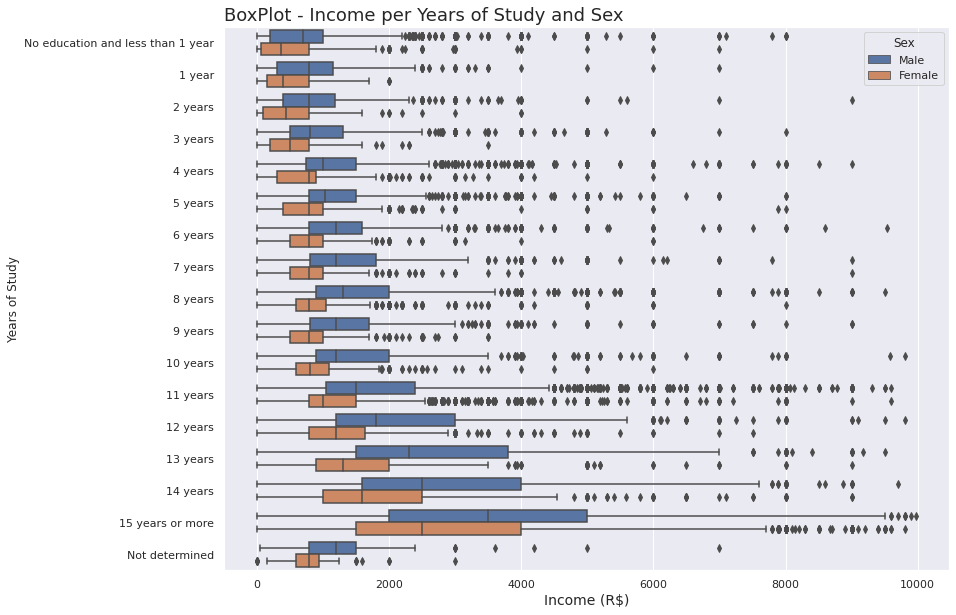

In [125]:
# Results limited to Income < 10000 for better visualization
ax = sns.boxplot(x='Income',y= 'Years of Study', data=data.query('Income < 10000'), orient='h', hue='Sex')
ax.figure.set_size_inches(13,10)
ax.set_title('BoxPlot - Income per Years of Study and Sex', fontsize=18, loc='left')
ax.set_yticklabels(years_of_study.values())
ax.legend_.texts[0].set_text('Male')
ax.legend_.texts[1].set_text('Female')
ax.set_xlabel('Income (R$)',fontsize=14)
ax = ax

> ### Conclusions

* Although there are cases where individuals with 1 year or less of education receive significant wages (up to R\$30,000 per month), the analysis of the sample indicates that the income is proportional to the number of years of study.

* The selection with the highest average income is the one related to individuals with 15 years or more of education.

* Female individuals have lower income than male individuals for all ranges of years of study.

* Women with 14 years of schooling have an income equivalent to men with 11 years of schooling, and women with 5 years of schooling have income equivalent to men without education or with up to 1 year of schooling.

### Retrieving the average, median, max value and standard deviation of the INCOME variable according to STATES


In [126]:
tab_income_state = data.groupby('State').agg({'Income':['mean', 'median', 'std']})
tab_income_state.rename(index=state, inplace=True)
tab_income_state

Income                     
                            mean  median          std
State                                                
Rondônia             1789.761223  1200.0  2406.161161
Acre                 1506.091782   900.0  2276.233415
Amazonas             1445.130100   900.0  1757.935591
Roraima              1783.588889  1000.0  2079.659238
Pará                 1399.076871   850.0  2053.779555
Amapá                1861.353516  1200.0  2020.688632
Tocantins            1771.094946  1000.0  2934.590741
Maranhão             1019.432009   700.0  1887.816905
Piauí                1074.550784   750.0  2373.355726
Ceará                1255.403692   789.0  1821.963536
Rio Grande do Norte  1344.721480   800.0  1651.805500
Paraíba              1293.370487   788.0  1950.272431
Pernambuco           1527.079319   900.0  2389.622497
Alagoas              1144.552602   788.0  1237.856197
Sergipe              1109.111111   788.0  1478.997878
Bahia                1429.645094   800.0  3507.917248
Minas Gerais         2056.432084  1200.0  3584.721547
Espírito Santo       2026.383852  1274.0  3513.846868
Rio de Janeiro       2496.403168  1400.0  5214.583518
São Paulo            2638.104986  1600.0  3503.777366
Paraná               2493.870753  1500.0  4302.937995
Santa Catarina       2470.854945  1800.0  3137.651112
Rio Grande do Sul    2315.158336  1500.0  2913.335783
Mato Grosso do Sul   2262.604167  1500.0  3031.419122
Mato Grosso          2130.652778  1500.0  2542.630178
Goiás                1994.580794  1500.0  2221.933065
Distrito Federal     4241.954722  2000.0  5550.463338

### Constructing a box plot of the INCOME variable according to brazilian STATES


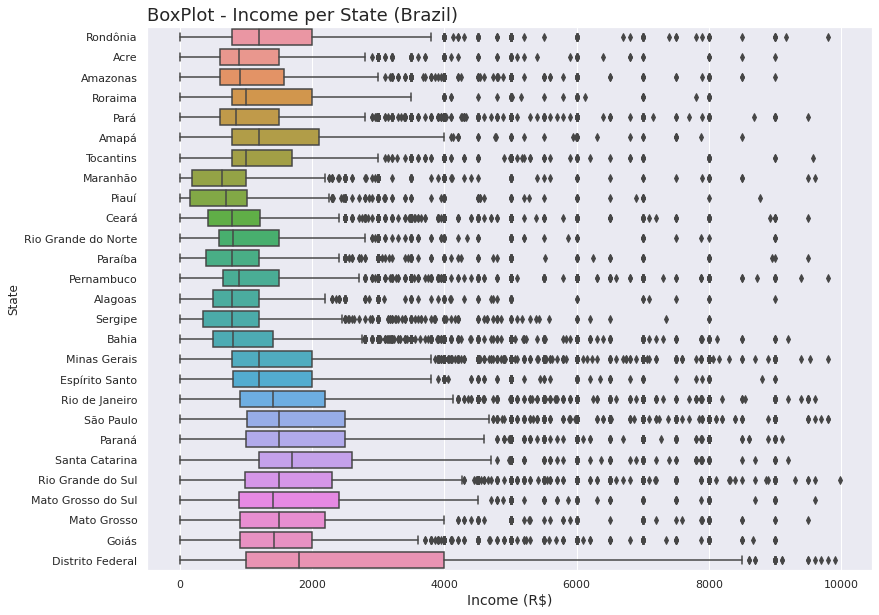

In [127]:
ax = sns.boxplot(x='Income',y= 'State', data=data.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(13,10)
ax.set_title('BoxPlot - Income per State (Brazil)', fontsize=18, loc='left')
ax.set_yticklabels(state.values())
ax.set_xlabel('Income (R$)',fontsize=14)
ax = ax

> ### Conclusions

* It is observed that the state with the highest average population income is the Distrito Federal (DF). This income can possibly be explained by the fact that the DF is the Brazilian capital, and the country's major political hub. It is also the state with the most dispersed incomes.

* The southern states seem to have a higher average income than the others (Paraná, Santa Catarina and Rio Grande do Sul), with Santa Catarina being the state with the highest average income.

* São Paulo and Paraná states have similar characteristics. However, the income at Paraná state is more dispersed.

* According to the sample data, the state with the lowest average income is Maranhão.